## EDA - Analysis of bounding boxes shape

From https://www.kaggle.com/aantonova/practical-eda-on-numerical-data

In [74]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
import pydicom

In [3]:
import gc
import warnings
warnings.simplefilter(action = 'ignore')

In [78]:
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

### Loading data

In [60]:
detailed_class_info = pd.read_csv('../data/stage_1_detailed_class_info.csv')
# detailed_class_info presents the same lines as train_labels which means some of them are duplicated
detailed_class_info = detailed_class_info.drop_duplicates()
train_labels = pd.read_csv('../data/stage_1_train_labels.csv')

df = pd.merge(left = detailed_class_info, right = train_labels, how = 'left', on = 'patientId')

#del detailed_class_info, train_labels
#gc.collect()

df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28989 entries, 0 to 28988
Data columns (total 7 columns):
patientId    28989 non-null object
class        28989 non-null object
x            8964 non-null float64
y            8964 non-null float64
width        8964 non-null float64
height       8964 non-null float64
Target       28989 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


### Number of bounding boxes per image

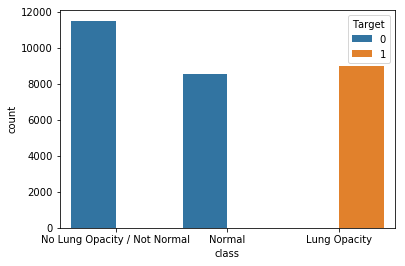

In [77]:
sns.countplot(x = 'class', hue = 'Target', data = df);

In [70]:
df[df['Target'] != 0]['patientId'].value_counts().value_counts()

2    3062
1    2481
3     105
4      11
Name: patientId, dtype: int64

### Bounding boxes distribution

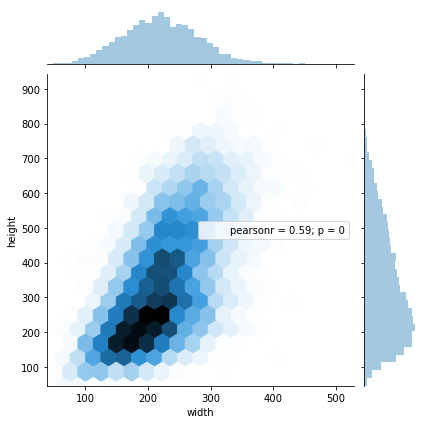

In [76]:
sns.jointplot(x = 'width', y = 'height', data = df, kind = 'hex', gridsize = 20);

In [79]:
k_means = KMeans(n_clusters=5)

In [ ]:
k_means.